In [1]:
# Add additional library
import sys, os
data_lib = os.path.abspath('../data')
eda_sp_lib = os.path.abspath('../signal_processing')
if data_lib not in sys.path:
    sys.path.append(data_lib)
if eda_sp_lib not in sys.path:
    sys.path.append(eda_sp_lib)


from data_utils import *
from visualisation_utils import *
import pywt
from sklearn.mixture import GaussianMixture
from eda_signal_processing import *

In [2]:
EDA_SAMPLING_RATE = 4

dp_manager = get_data_path_manager()
wesad_wrist_metadata = load_metadata(dp_manager.WESAD_wrist_metadata_path)

In [3]:
DATASET_NAME = 'WESAD'
DEVICE = 'wrist'
SIGNAL_NAME = 'EDA'
USER_ID = 'S10'

In [4]:
raw_signal = load_raw_signal(dp_manager, DATASET_NAME, USER_ID, DEVICE, SIGNAL_NAME)
user_metadata = wesad_wrist_metadata[USER_ID]

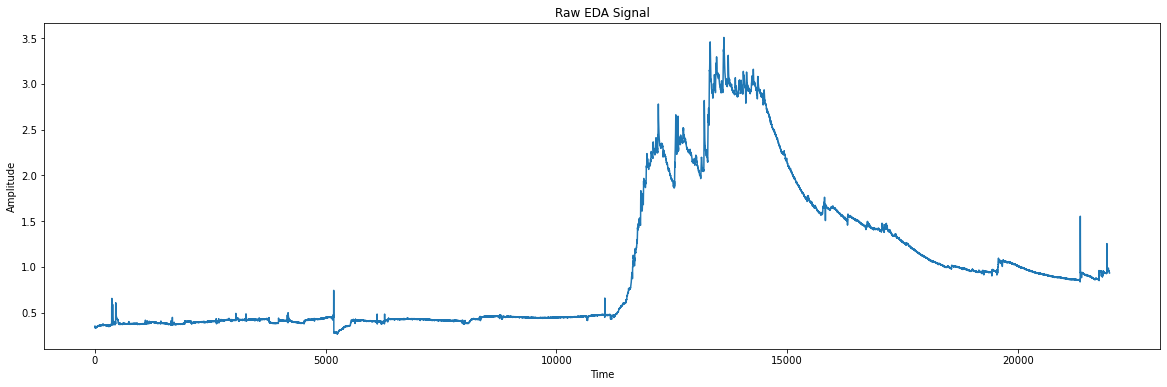

In [5]:
plot_signal(raw_signal, title = 'Raw EDA Signal')

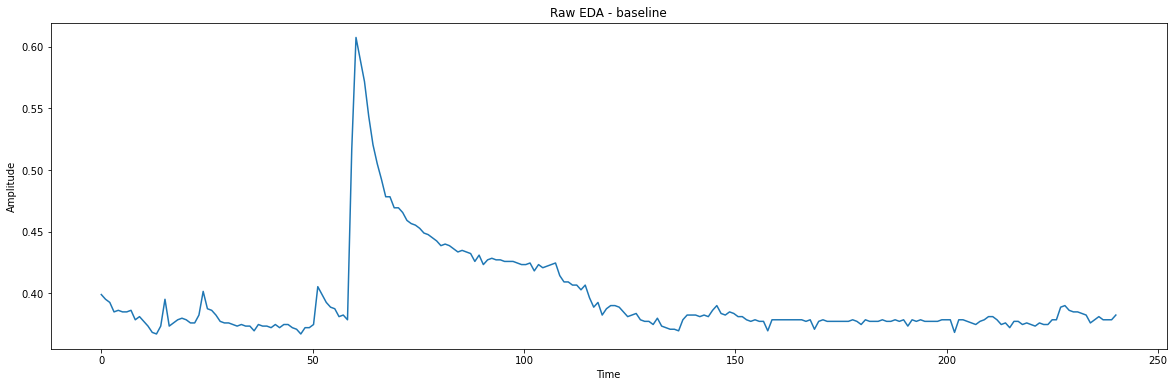

In [23]:
for i, label in enumerate(user_metadata['labels']):
    starting_index = user_metadata['eda']['starting_indices'][i]
    ending_index = user_metadata['eda']['ending_indices'][i]
    trim_indices = (starting_index, ending_index)
    trimmed_signal = get_trimmed_signal(raw_signal, trim_indices, lag = 60, sampling_rate = EDA_SAMPLING_RATE)
    title = f'Raw EDA - {label}'
    plot_signal(trimmed_signal[260:260 + EDA_SAMPLING_RATE * 60], title = title)
    break

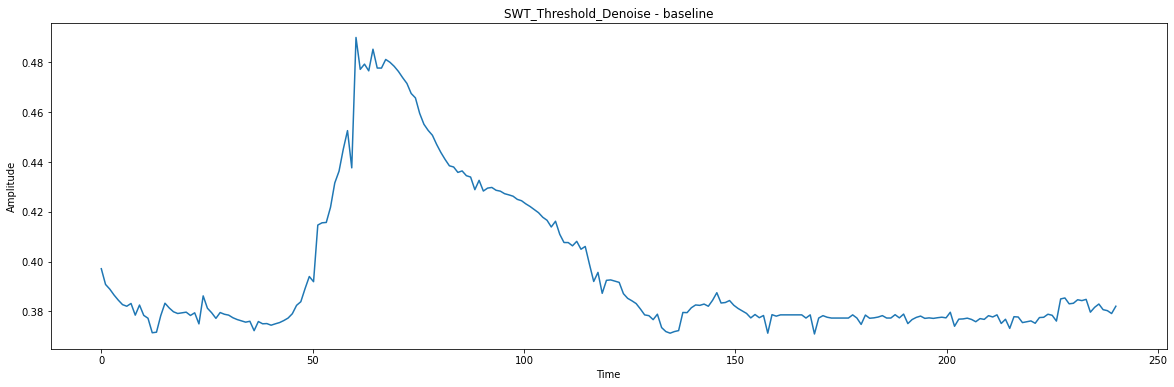

In [22]:
swt_denoiser = SWT_Threshold_Denoiser()
signal = swt_denoiser.denoise(trimmed_signal[260:260 + EDA_SAMPLING_RATE * 60])
plot_signal(signal, title = f'SWT_Threshold_Denoise - {label}')

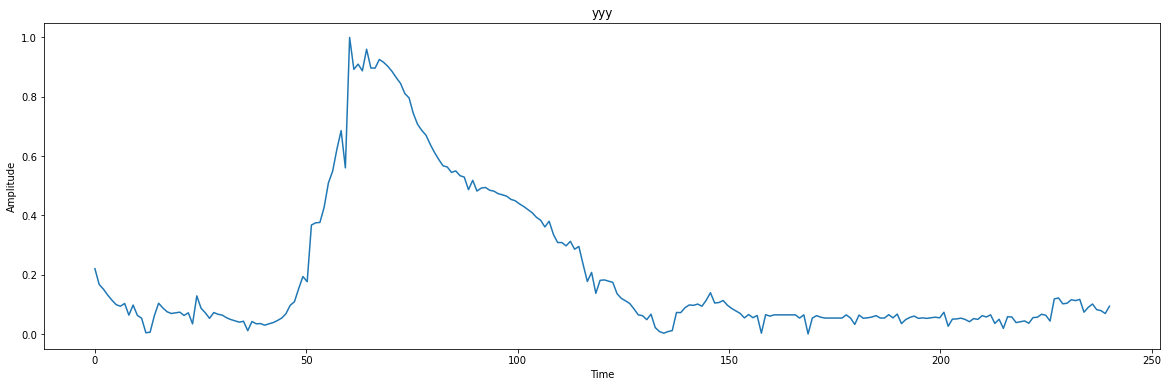

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaled_signal = MinMaxScaler().fit_transform(signal.reshape(-1, 1)).ravel()
plot_signal(scaled_signal, title = 'yyy')

In [25]:
eda_processor = EDA_Signal_Processor()
signals = eda_processor.eda_signal_processing(scaled_signal, EDA_SAMPLING_RATE)
signals

,EDA_Cleaned,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,0.220090,0.193876,0.000000,0,0,0.0,0.0,0.0,0,0.0
1,0.175318,0.184748,0.000000,0,0,0.0,0.0,0.0,0,0.0
2,0.146393,0.175520,-0.021140,0,0,0.0,0.0,0.0,0,0.0
3,0.129301,0.166219,-0.037475,0,0,0.0,0.0,0.0,0,0.0
4,0.114594,0.156869,-0.046185,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
235,0.094340,0.038160,0.049629,0,0,0.0,0.0,0.0,0,0.0
236,0.088915,0.037377,0.047159,0,0,0.0,0.0,0.0,0,0.0
237,0.073750,0.036562,0.044859,0,0,0.0,0.0,0.0,0,0.0
238,0.072843,0.035714,0.043644,0,0,0.0,0.0,0.0,0,0.0


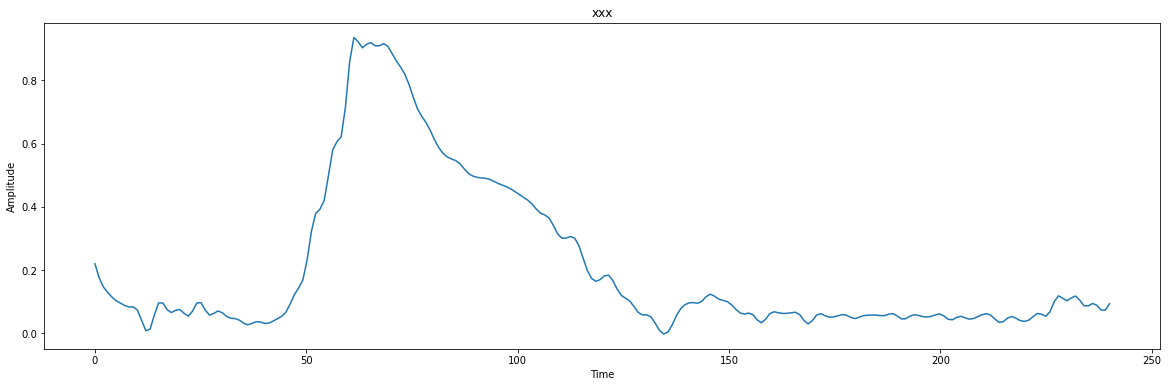

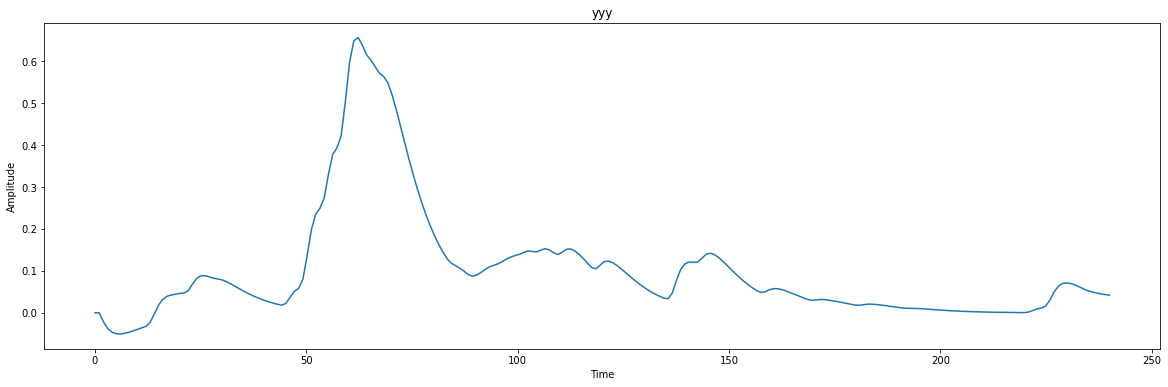

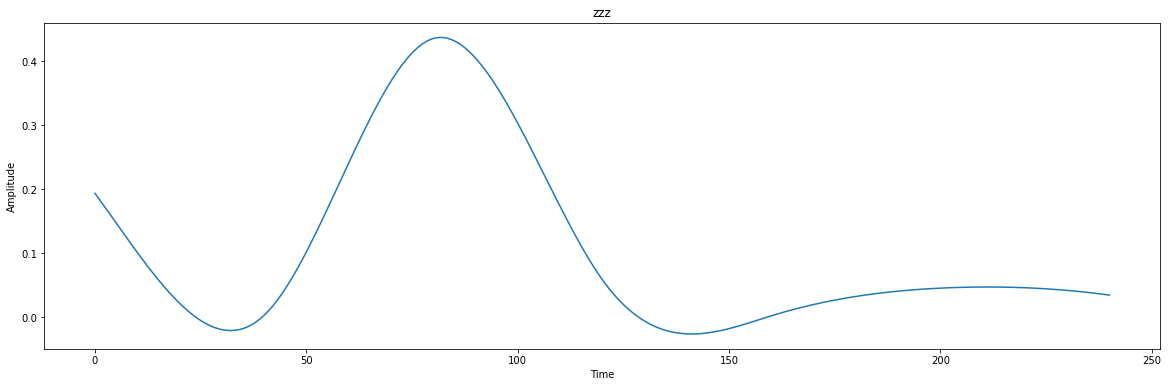

In [26]:
plot_signal(signals['EDA_Cleaned'], title = 'xxx')
plot_signal(signals['EDA_Phasic'], title = 'yyy')
plot_signal(signals['EDA_Tonic'], title = 'zzz')